# Using Letters and digits to model

Based on MNIST dataset, I'll use another dataset that uses letters and numbers to train a model and make a prediction.

Link to dataset => https://www.kaggle.com/datasets/swarupshah/digit-character?select=digit_char_dataset.csv

So, open the link, download and extract the dataset to see more details below at training.

PS: The zip file is 200MB. Github doesn't support that size. That's why I can't provide It at this folder.

# 1. Collecting and treating the data

Unziping the data inside archive.zip

In [3]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Creating dataset based on the initial CSV

df = pd.read_csv('./digits_letters/digit_char_dataset.csv')

In [4]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


<AxesSubplot: >

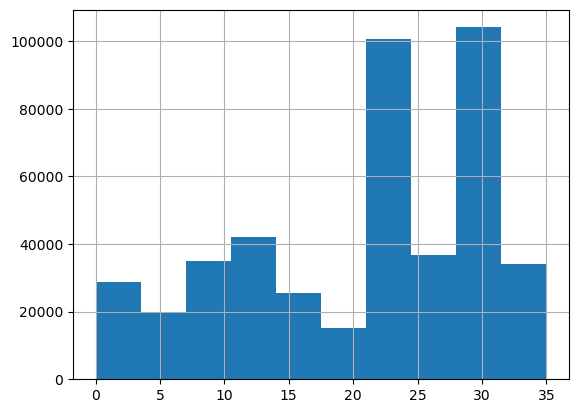

In [6]:
df['class'].hist()

Seeing images

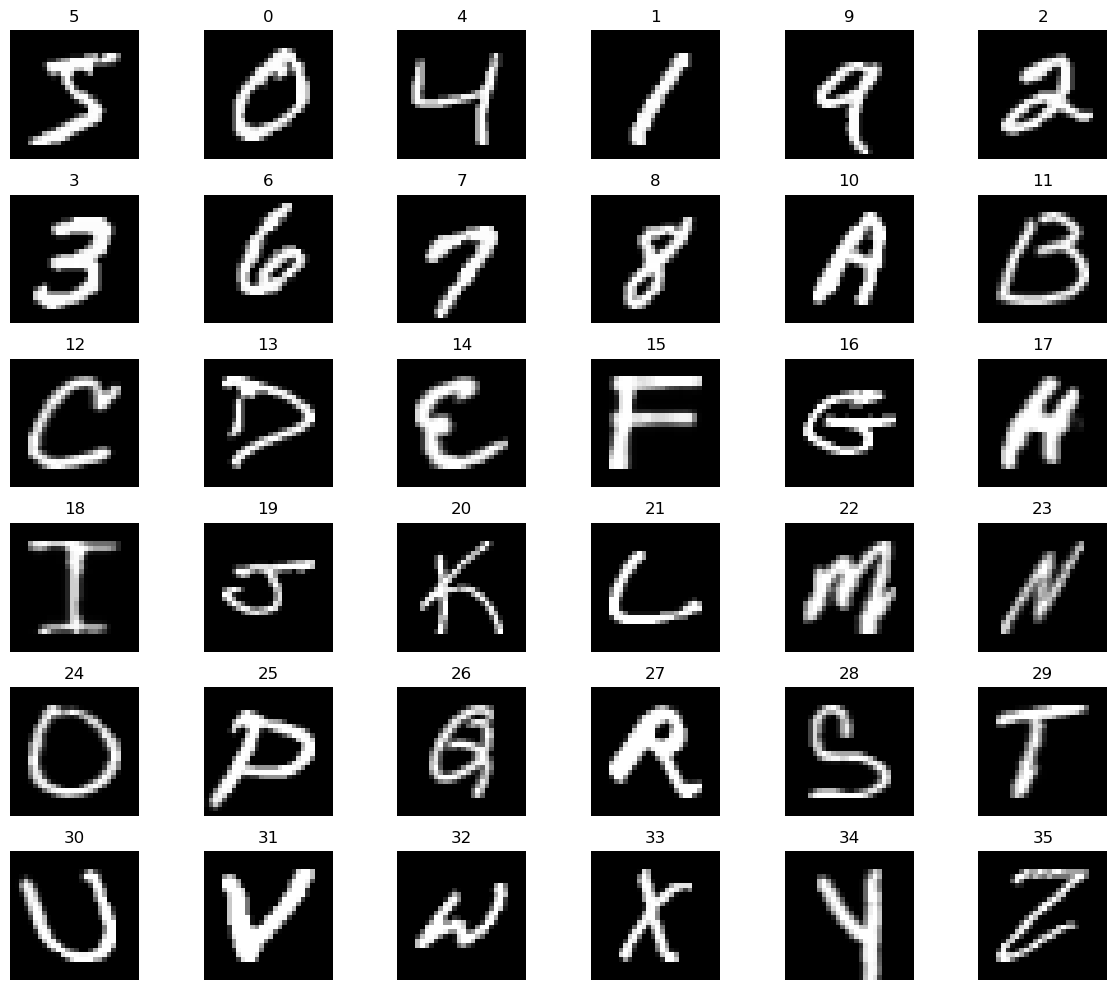

In [60]:
plt.figure(figsize=(12,10))

dataset_without_duplicates = df.drop_duplicates(subset='class')

for i in range(36):
    plt.subplot(6,6,i + 1)
    img = np.array(dataset_without_duplicates.iloc[i,:-1]).reshape(28, 28)
    plt.title(dataset_without_duplicates.iloc[i,-1])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
  
plt.tight_layout()
plt.show()


# 2. Model creation

## 2.1 Data pre-processing and visualization

In [81]:
import tensorflow as tf

x = df.iloc[:,:-1].values.astype('float32')
y = df['class'].values

In [82]:
x = x/255.00 #Normalization

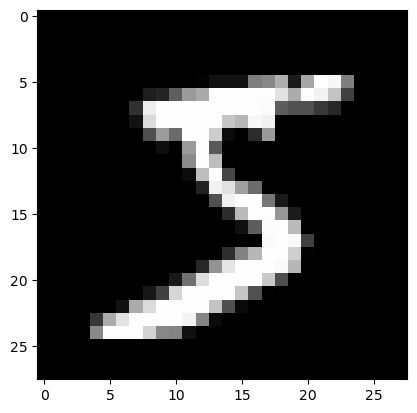

In [84]:
#Seeing one image 
plt.imshow(x[0].reshape(28,28),cmap='gray')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
import keras

CLASSES = len(np.unique(y))
IMG_SIZE_RESHAPE = 28

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
x_train = x_train.reshape(-1,IMG_SIZE_RESHAPE,IMG_SIZE_RESHAPE,1)
x_test = x_test.reshape(-1,IMG_SIZE_RESHAPE,IMG_SIZE_RESHAPE,1)



y_train = keras.utils.to_categorical(y_train,CLASSES)
y_test = keras.utils.to_categorical(y_test, CLASSES)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (296441, 28, 28, 1)
y_train shape: (296441, 36)


In [87]:
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (146009, 28, 28, 1)
y_test shape: (146009, 36)


## 2.2 Model Creation

In [94]:
from tensorflow.keras import layers, models,utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator


INPUT_IMG_SHAPE = (28,28,1)
CLASSES = len(np.unique(y))


model = models.Sequential([
    layers.Input(shape=INPUT_IMG_SHAPE),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(CLASSES,activation='softmax')

])


In [95]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               204928    
          

In [96]:
# Training data
hist = model.fit(x_train, y_train,steps_per_epoch=500, batch_size=64,epochs=10, validation_data=(x_test, y_test),verbose=1)

Epoch 1/10
500/500 [==============================] - 38s 74ms/step - loss: 0.9382 - accuracy: 0.7409 - val_loss: 0.3154 - val_accuracy: 0.9077
Epoch 2/10
500/500 [==============================] - 35s 70ms/step - loss: 0.3302 - accuracy: 0.9030 - val_loss: 0.2421 - val_accuracy: 0.9298
Epoch 3/10
500/500 [==============================] - 34s 68ms/step - loss: 0.2691 - accuracy: 0.9218 - val_loss: 0.1823 - val_accuracy: 0.9470
Epoch 4/10
500/500 [==============================] - 34s 69ms/step - loss: 0.2338 - accuracy: 0.9323 - val_loss: 0.1726 - val_accuracy: 0.9502
Epoch 5/10
500/500 [==============================] - 37s 75ms/step - loss: 0.2106 - accuracy: 0.9381 - val_loss: 0.1627 - val_accuracy: 0.9516
Epoch 6/10
500/500 [==============================] - 34s 69ms/step - loss: 0.1983 - accuracy: 0.9408 - val_loss: 0.1423 - val_accuracy: 0.9586
Epoch 7/10
500/500 [==============================] - 35s 70ms/step - loss: 0.1849 - accuracy: 0.9464 - val_loss: 0.1404 - val_accuracy:

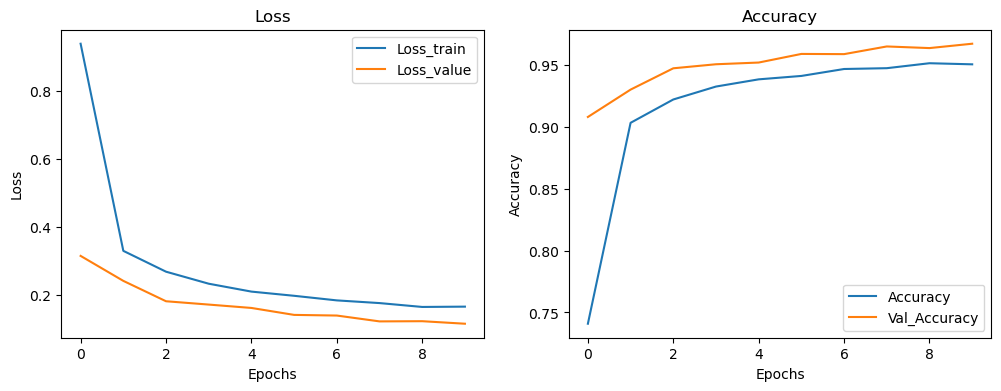

In [97]:
plt.figure(figsize=(12,4))

# Seeing the loss

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label="Loss_train")
plt.plot(hist.history['val_loss'], label='Loss_value')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], label="Accuracy")
plt.plot(hist.history['val_accuracy'], label='Val_Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [98]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Acuraccy in Test: {test_acc * 100:.2f}%")
print(f"Loss in Test: {test_loss:.2f}")

4563/4563 - 28s - loss: 0.1164 - accuracy: 0.9668 - 28s/epoch - 6ms/step
Acuraccy in Test: 96.68%
Loss in Test: 0.12


In [99]:
model.save('saved_model/letter_model.keras',save_format='keras')

In [100]:
# Created a dict to invert labels
base_36_dict = {i: str(i) for i in range(10)}  # digits from 0 to 9
base_36_dict.update({i: chr(i + 55) for i in range(10, 36)})  #Letters 

print(base_36_dict)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


After training the model, put in plots to see the results

1/1 [==============================] - 0s 26ms/step


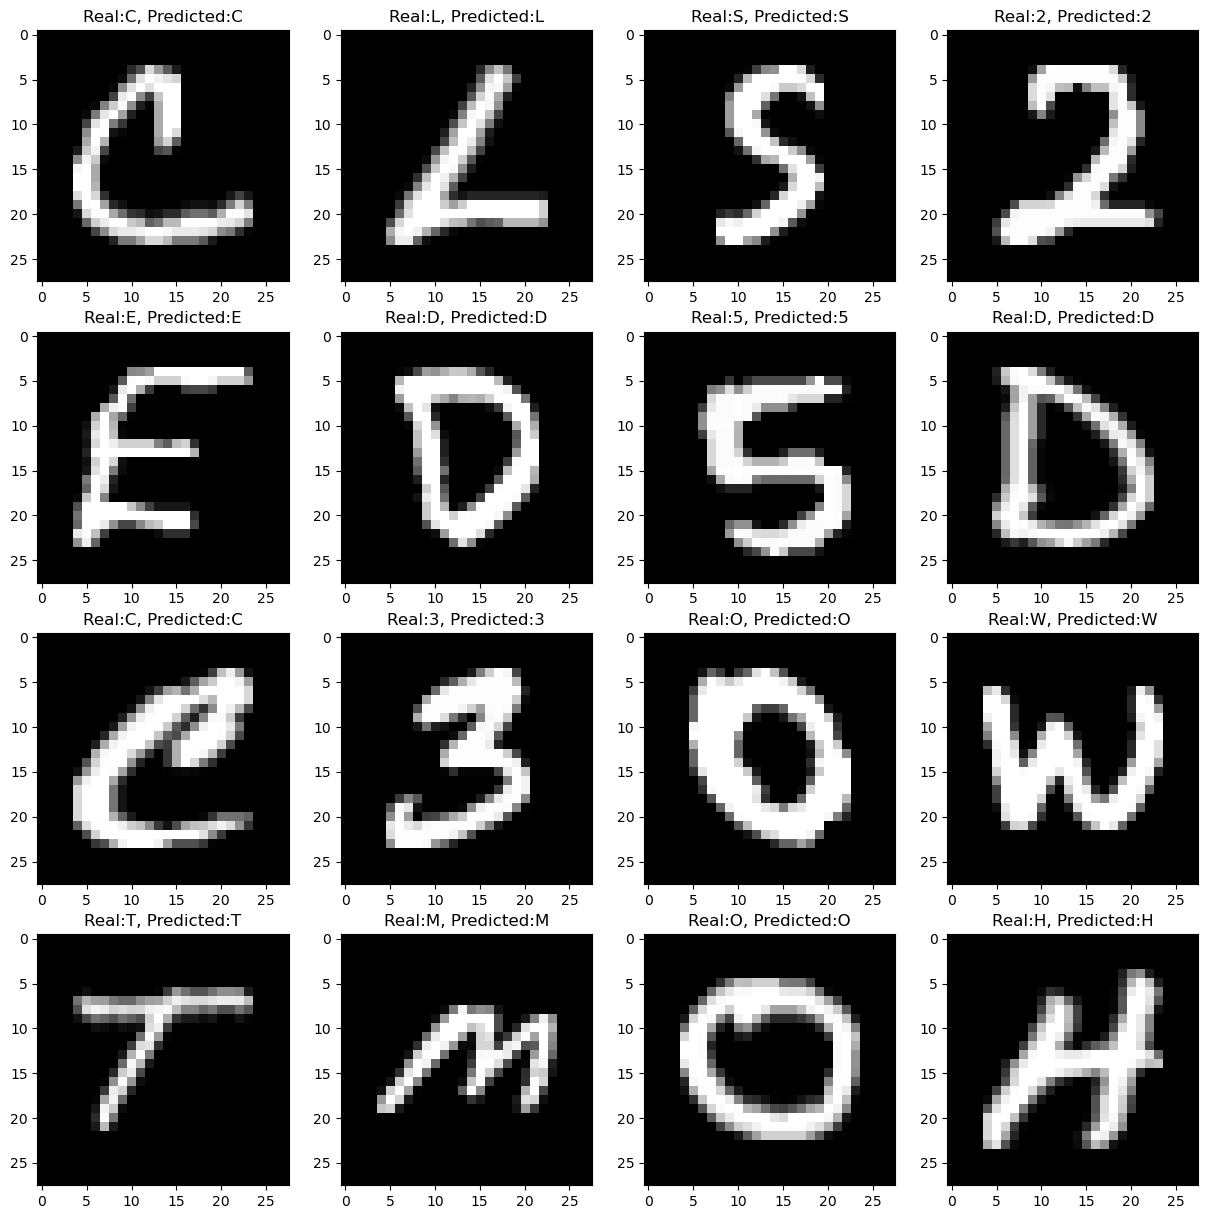

In [104]:
predictions = model.predict(x_test[:16])

plt.figure(figsize=(15,15))
for i in range(16):
    
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    y_real_label = base_36_dict[y_test[i].argmax()]
    y_predicted = base_36_dict[predictions[i].argmax()]

    plt.title(f'Real:{y_real_label}, Predicted:{y_predicted}')
plt.show()
    